In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [2]:
dat = pd.read_csv("iris.csv")
dat.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
dat = dat[dat["Species"] != "setosa"]

In [4]:
X = dat[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = dat['Species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test) 

In [5]:
pd.DataFrame({'test': y_test, 'predict': y_pred}).head()

,test,predict
133,virginica,versicolor
103,virginica,virginica
120,virginica,virginica
95,versicolor,versicolor
94,versicolor,versicolor


In [6]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8333333333333334


## ex3. Search the best K

In [7]:
# Exhaustive search for k up to k==25
error_rate = []

for i in range(1, 25):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
    classifier.fit(X_train, np.ravel(y_train))
    pred_i = classifier.predict(X_test)
    
    error_rate.append(np.mean(pred_i != np.ravel(y_test)))

Text(0, 0.5, 'Error rate')

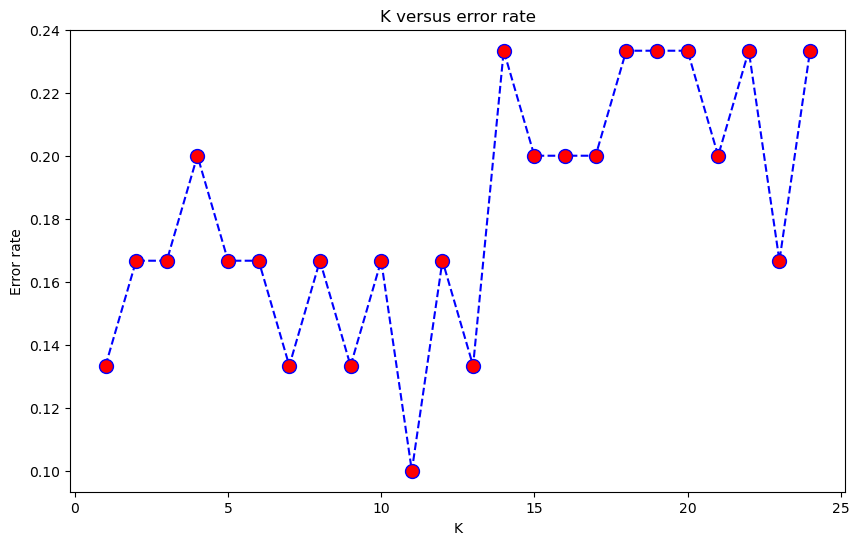

In [8]:
# Plotting the error rates for differnt k
plt.figure(figsize=(10, 6))

plt.plot(range(1, 25), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus error rate')
plt.xlabel('K')
plt.ylabel('Error rate')

In this situation we can use k=1 as the best k, because the next k with lower Error rate is k=11, but it requires much more computational resources.

## Additional search of the best k
Using GridSearchCV

In [9]:

gs = GridSearchCV(estimator = knn,
    param_grid = {'n_neighbors' : list(range(1,25))},
    scoring = 'accuracy',
    cv = 5,
    refit = True)
best_model = gs.fit(X_train, y_train).best_estimator_
print('Best k : %d' % best_model.get_params()['n_neighbors'])

Best k : 2


In this case GridSearchCV suggests k=2 as the best k for our model. It is different to our previous k, because with GridSearchCV we use *cv=5*, which sets up 5-fold cross-validation. That's why this answer should be more appropriate, since the model was trained on 4 folds and tests it on the remaining fold, repeating this process 5 times, each time with a different test fold. 

In [10]:
gs = GridSearchCV(estimator = knn,
    param_grid = {'n_neighbors' : list(range(1,25))},
    scoring = 'accuracy',
    cv = 3,
    refit = True)
best_model = gs.fit(X_train, y_train).best_estimator_
print('Best k : %d' % best_model.get_params()['n_neighbors'])

Best k : 3


Interesting that we got k=3 as the best k, if we use 3-fold cross-validation. This answer is the same as we got in R code for kNN method.